# UNSUPERVISED

## PCA

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

cancer = load_breast_cancer()

In [12]:
contoh = pd.DataFrame({'featureA': [1,2,3,4,5,3,3,3,3,3], 'featureB': [3,3,3,3,3,1,2,3,4,5], 'target': [1,2,3,4,5,3,3,3,3,3]})
contoh

,featureA,featureB,target
0,1,3,1
1,2,3,2
2,3,3,3
3,4,3,4
4,5,3,5
5,3,1,3
6,3,2,3
7,3,3,3
8,3,4,3
9,3,5,3


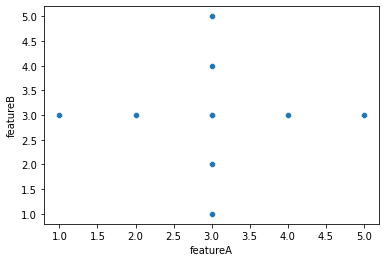

In [10]:
sns.scatterplot(x='featureA', y='featureB', data=contoh)
plt.show()

In [13]:
contoh.corr()

,featureA,featureB,target
featureA,1.0,0.0,1.0
featureB,0.0,1.0,0.0
target,1.0,0.0,1.0


In [18]:
cancer['data'].shape

(569, 30)

In [21]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [23]:
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


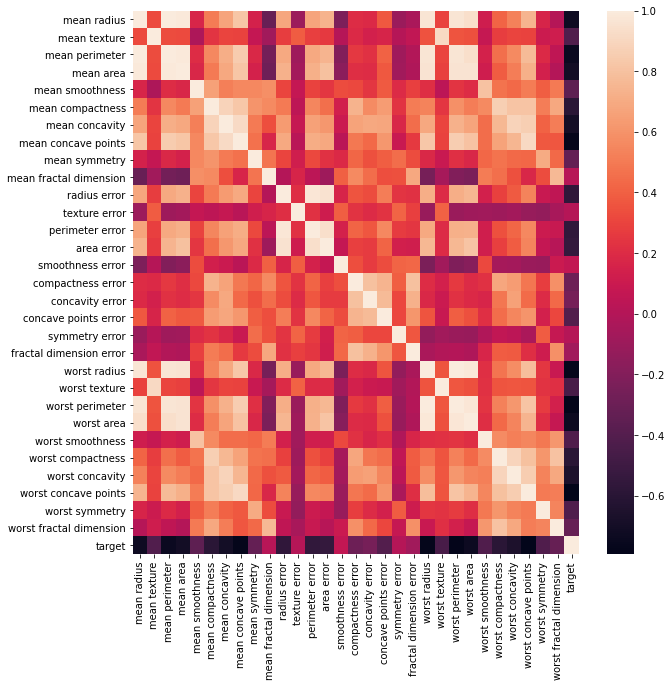

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

In [28]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Scaler

In [30]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [31]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [32]:
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


## Information Extracted

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled) # guru lagi mempelajari ulang materi2nya.

X_pca = pca.transform(X_scaled) # guru mulai membuat rangkuman baru.

In [47]:
np.sum(pca.explained_variance_ratio_[0:2]) # n_components = 30

0.6324320765155941

In [54]:
np.sum(pca.explained_variance_ratio_) # n_components = 2

0.6324320765155942

In [55]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [35]:
print('Original shape: {}'.format(str(X_scaled.shape)))
print('Reduced shape: {}'.format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


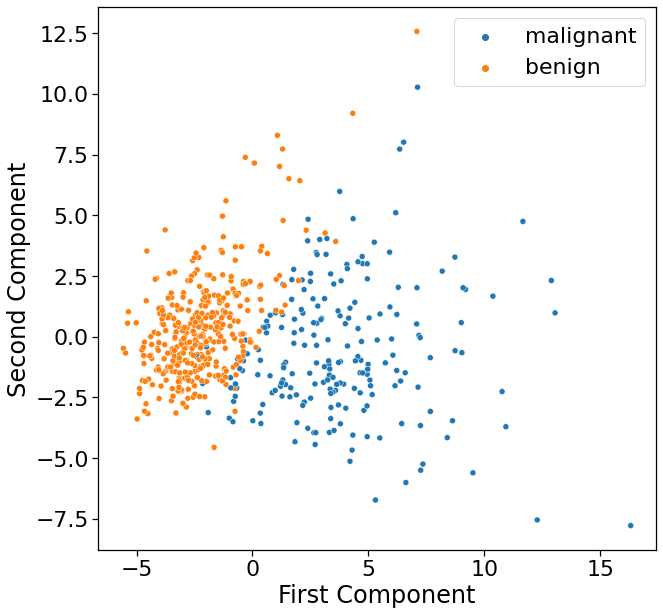

In [36]:
plt.figure(figsize=(10,10))
sns.set_context(context='notebook', font_scale=2)
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=np.where(df['target']==0,'malignant','benign'))

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

In [37]:
logit = LogisticRegression()

df_pca = pd.DataFrame({'PC1': X_pca[:,0], 'PC2': X_pca[:,1], 'target': df['target']})
df_pca.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [56]:
X = df_pca.drop('target', axis=1)
y = df_pca['target']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=2020)

In [58]:
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



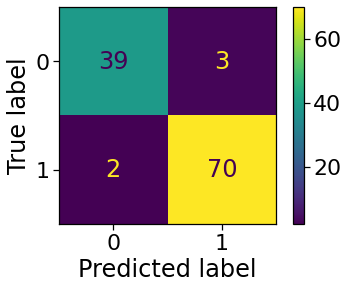

In [61]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logit, X_test, y_test)

In [62]:
y.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

## No PCA

In [63]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [64]:
X2 = df.drop('target', axis=1)
y2 = df['target']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, test_size=.2, random_state=2020)

C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


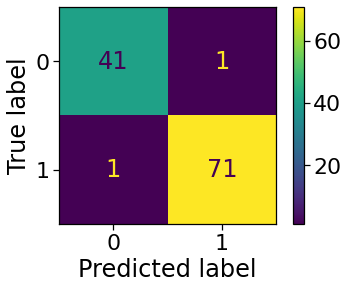

In [67]:
logit2 = LogisticRegression()
logit2.fit(X2_train, y2_train)
y2_pred = logit2.predict(X2_test)
plot_confusion_matrix(logit2, X2_test, y2_test)

In [68]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Clustering: K-Means

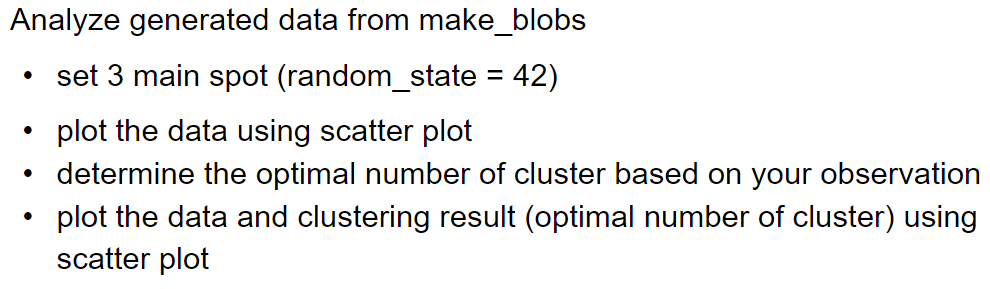

In [69]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Generate data

X, y = make_blobs(random_state=42, n_features=2)

In [76]:
X[:10]

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415]])

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

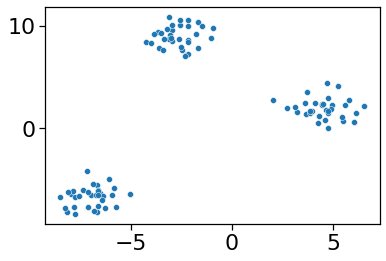

In [78]:
sns.scatterplot(X[:,0], X[:,1])

## Fit K-means

In [82]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

## Scatterplot and Clustering Result

In [83]:
kmeans.labels_

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

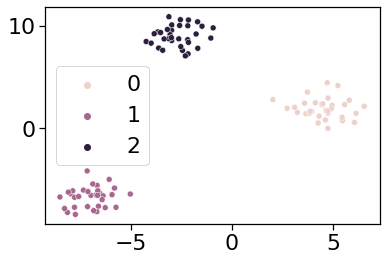

In [84]:
sns.scatterplot(X[:,0], X[:,1], hue=kmeans.labels_)

## Clustering K-Means 2

In [85]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score 

import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [89]:
df = pd.read_csv('../data/ilustrasi k means.csv', sep=';')
df

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


Text(0, 0.5, 'Tinggi Badan Istri')

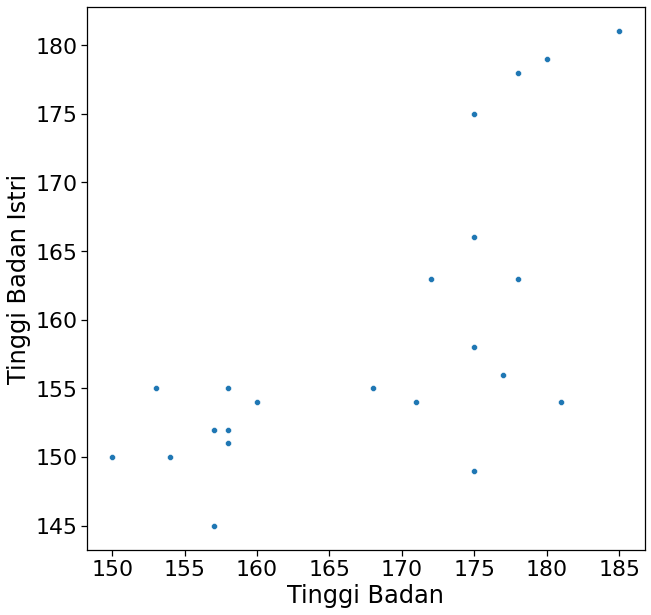

In [90]:
plt.figure(figsize=(10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    data = df
)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

## Determine The Optimal Number of Cluster

In [92]:
X = df
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [93]:
kmeans.inertia_

1779.0833333333337

In [97]:
inertias = []
for i in range(1,23):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


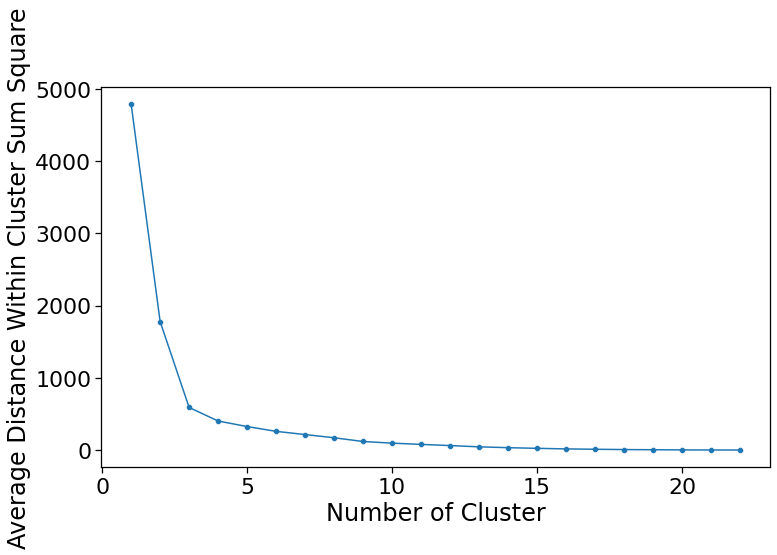

In [98]:
plt.figure(figsize=(12,7))
sns.lineplot(range(1,23), inertias)
sns.scatterplot(range(1,23), inertias)
plt.xlabel('Number of Cluster')
plt.ylabel('Average Distance Within Cluster Sum Square')
plt.show()

In [100]:
inertias

[4789.545454545454,
 1779.0833333333337,
 589.0833333333334,
 401.6944444444444,
 324.86111111111103,
 258.35,
 214.08333333333331,
 169.66666666666666,
 117.93333333333332,
 95.26666666666668,
 77.93333333333334,
 61.43333333333334,
 44.10000000000001,
 32.33333333333333,
 23.333333333333336,
 15.333333333333334,
 10.333333333333334,
 6.333333333333334,
 3.833333333333333,
 1.3333333333333333,
 0.5,
 0.0]

## Silhouette Score

In [102]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [103]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [104]:
silhouette_score(X, labels, metric='euclidean')

0.5080353833629737

In [107]:
silhouette = []
for i in range(2,22):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels, metric='euclidean'))

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


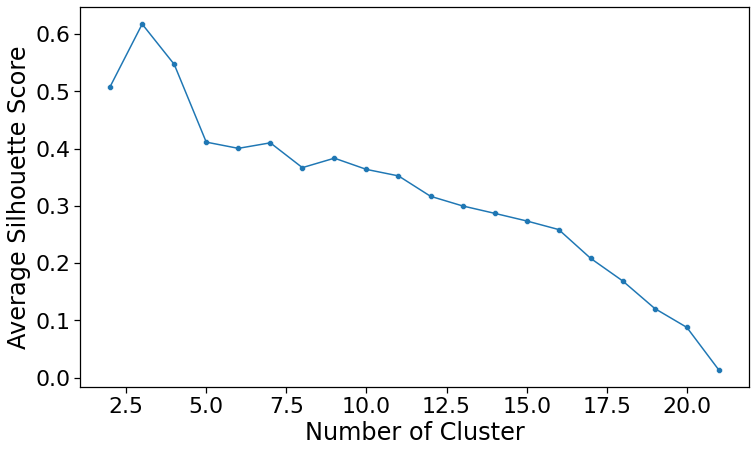

In [115]:
plt.figure(figsize=(12,7))
sns.lineplot(range(2,22), silhouette)
sns.scatterplot(range(2,22), silhouette)
plt.xlabel('Number of Cluster')
plt.ylabel('Average Silhouette Score')
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5080353833629737
For n_clusters = 3 The average silhouette_score is : 0.6172319390416597
For n_clusters = 4 The average silhouette_score is : 0.5469497456399819
For n_clusters = 5 The average silhouette_score is : 0.4111440672930426
For n_clusters = 6 The average silhouette_score is : 0.40457946055367466


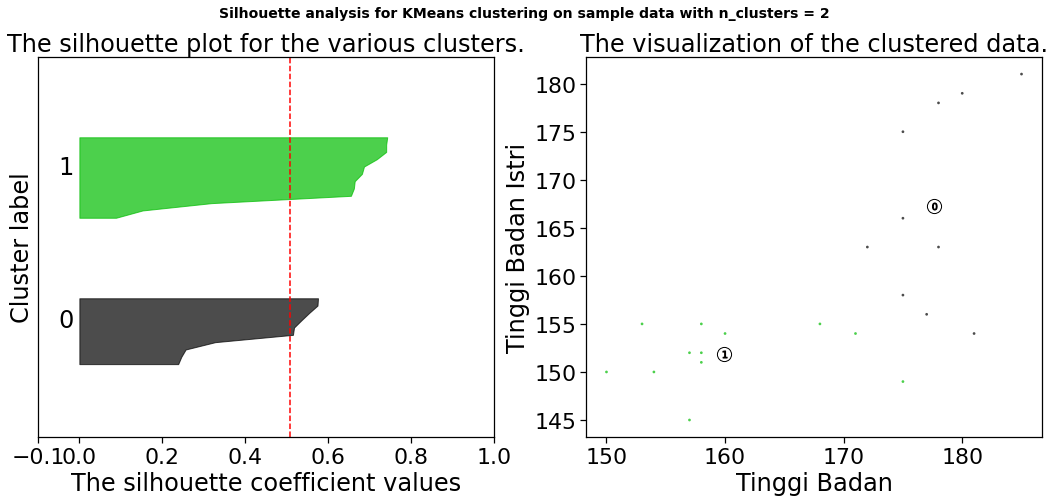

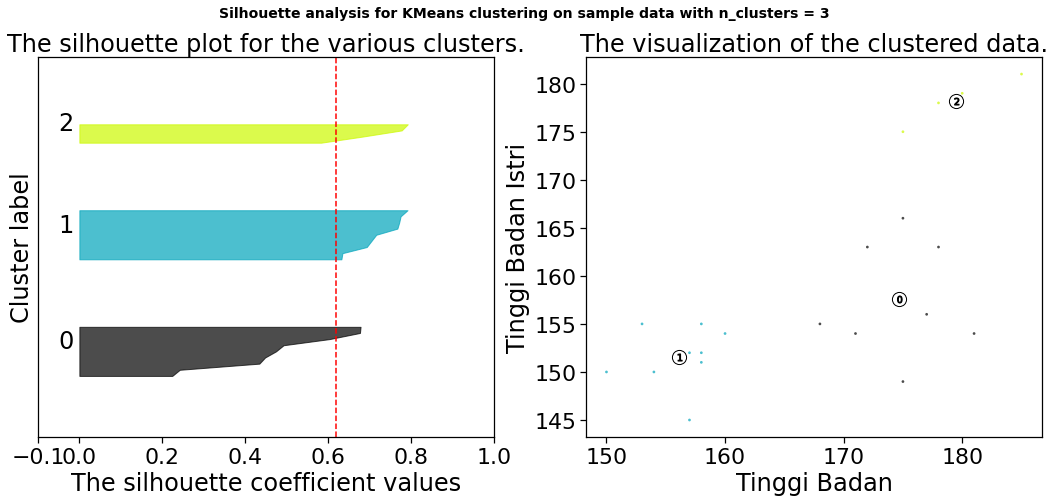

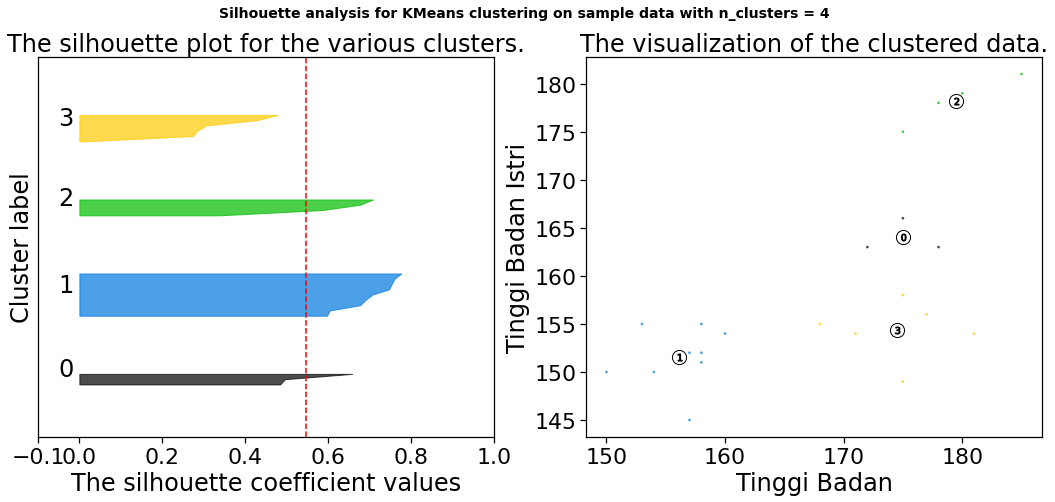

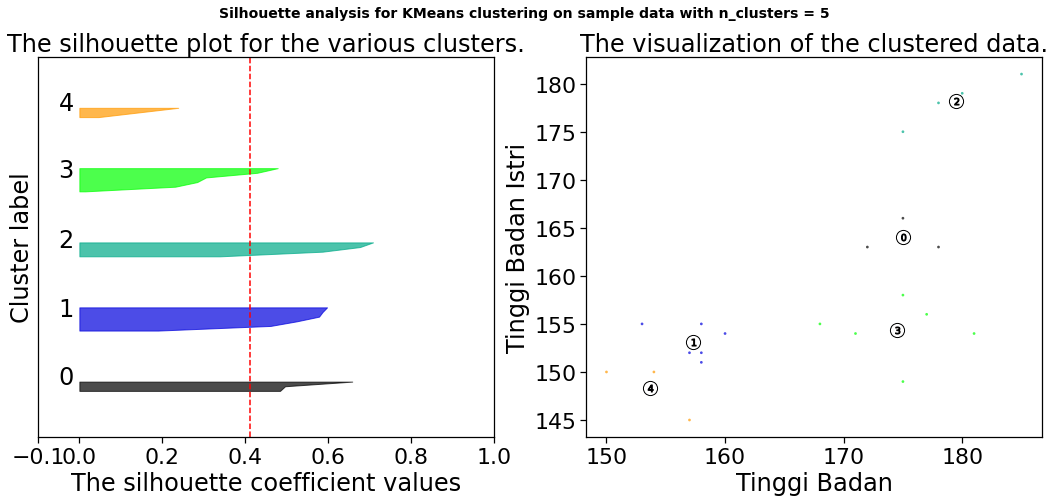

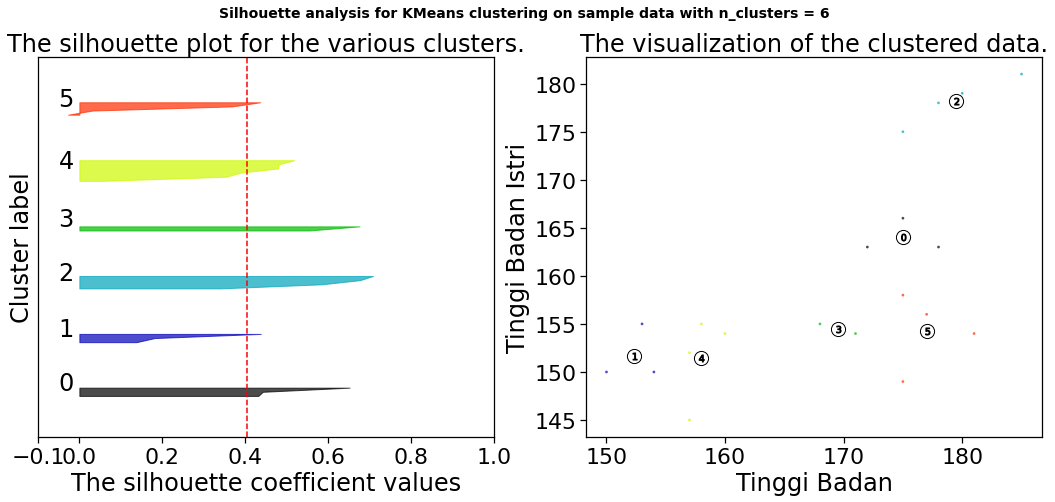

In [116]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['tinggibadan'], X['tinggibadanistri'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_ # centroid
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Tinggi Badan")
    ax2.set_ylabel("Tinggi Badan Istri")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [117]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [118]:
df['clusters'] = kmeans.labels_

In [119]:
kmeans.cluster_centers_

array([[174.66666667, 157.55555556],
       [156.11111111, 151.55555556],
       [179.5       , 178.25      ]])

Text(0.5, 0, 'Tinggi Badan Istri')

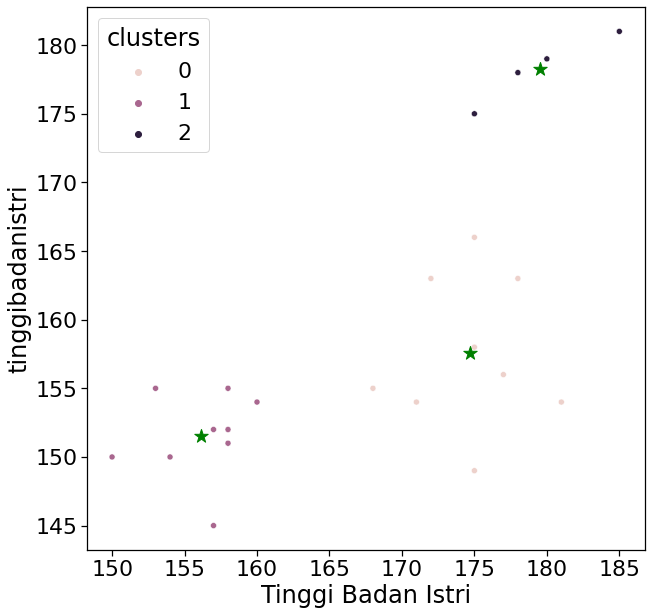

In [123]:
plt.figure(figsize=(10,10))

sns.scatterplot(x='tinggibadan', y='tinggibadanistri', hue='clusters', data=df)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='green', marker='*', s=200)
plt.xlabel('Tinggi Badan')
plt.xlabel('Tinggi Badan Istri')

## Agglomerative Clustering

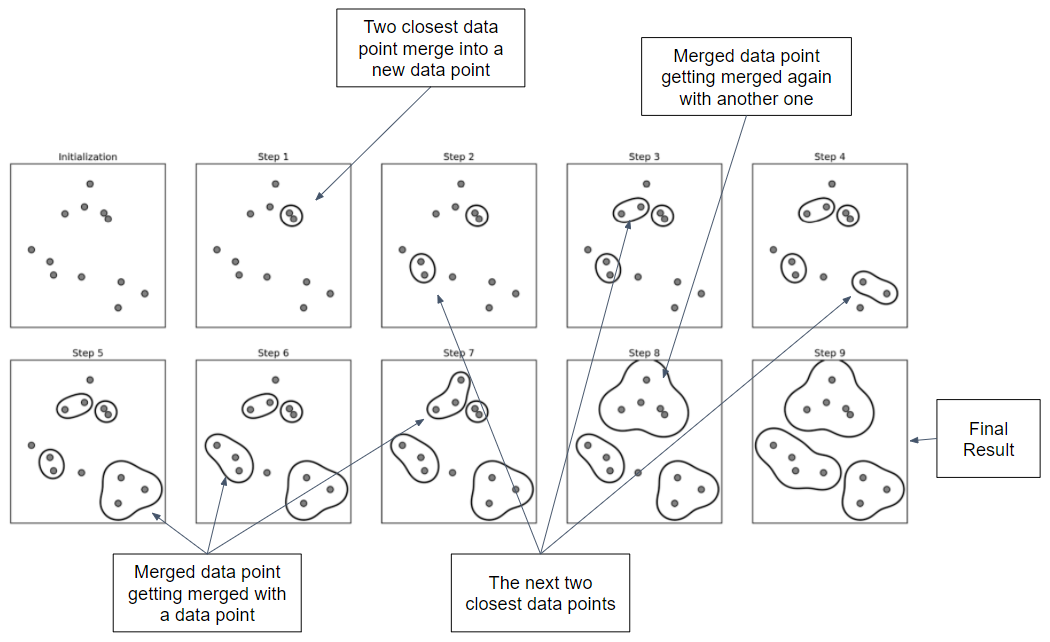

In [124]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df2 = df.drop('clusters', axis=1).copy()

In [127]:
df2

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


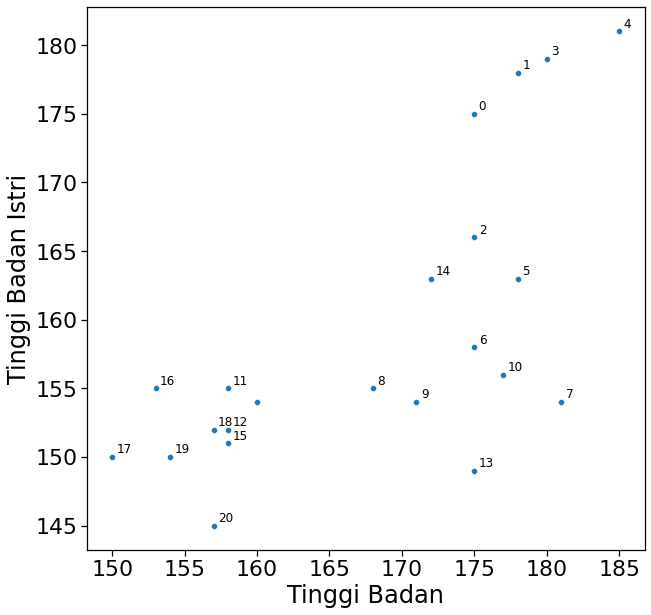

In [130]:
plt.figure(figsize=(10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan',
    y = 'tinggibadanistri',
    data = df
)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(0, df.shape[0]-1)):
    plt.annotate(txt, (df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize=12)

## Dendrogram

In [131]:
from scipy.cluster.hierarchy import dendrogram, ward, average, complete, single

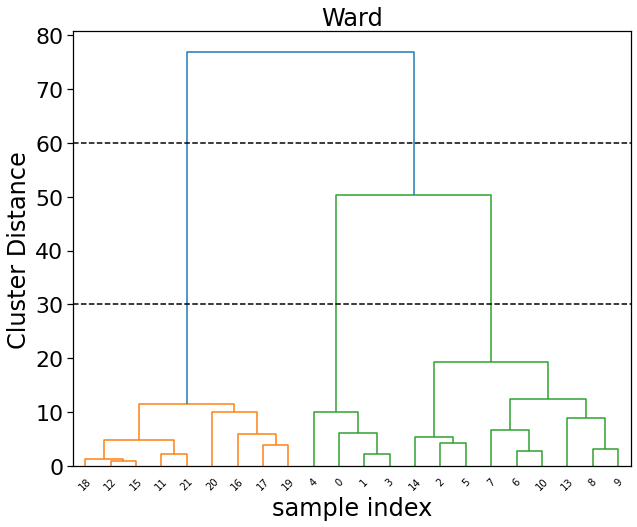

In [133]:
linkage_array = ward(X)

plt.figure(figsize=(10,8))
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [60,60], '--', c='k')
ax.plot(bounds, [30,30], '--', c='k')

plt.title('Ward')
plt.xlabel('sample index')
plt.ylabel('Cluster Distance')

plt.show()

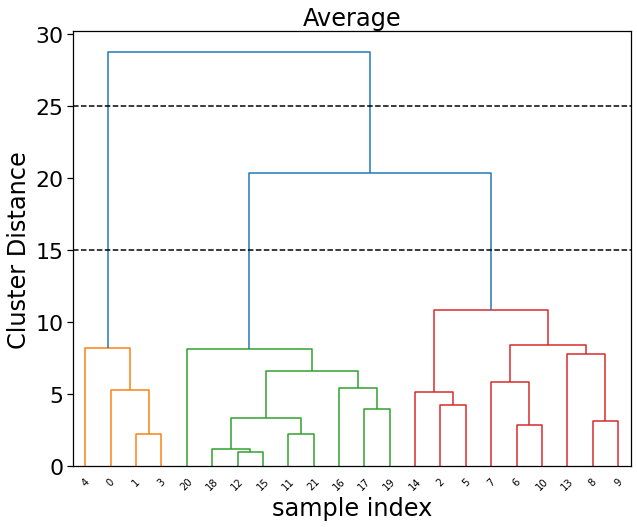

In [135]:
linkage_array = average(X)

plt.figure(figsize=(10,8))
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [25,25], '--', c='k')
ax.plot(bounds, [15,15], '--', c='k')

plt.title('Average')
plt.xlabel('sample index')
plt.ylabel('Cluster Distance')

plt.show()

## Clustering DBSCAN

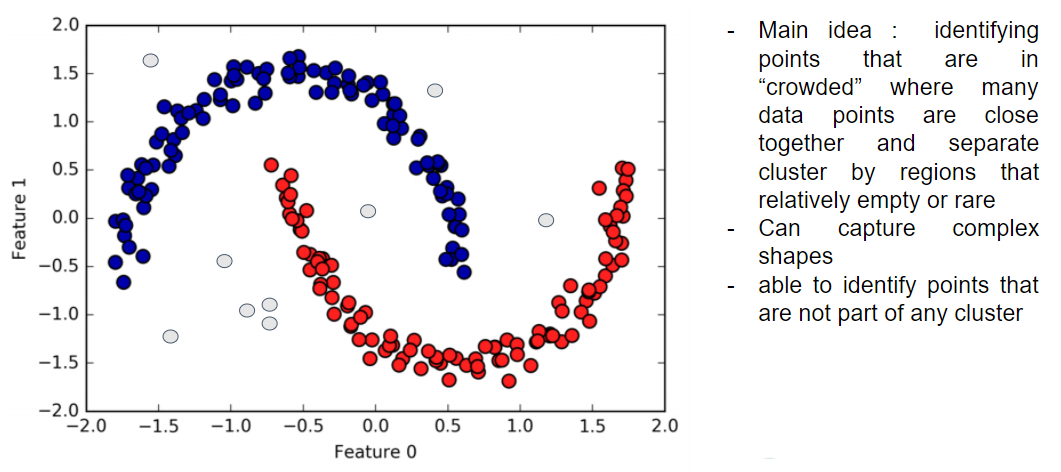

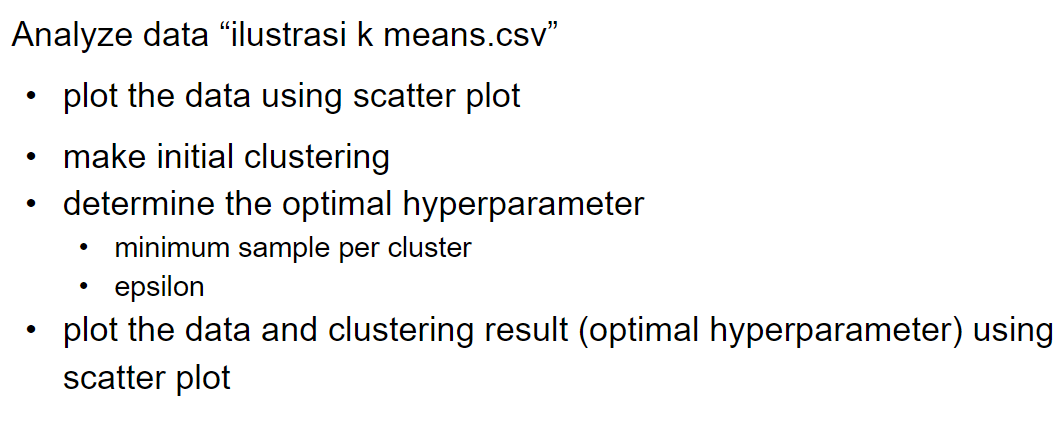

In [137]:
df2 = df[['tinggibadan', 'tinggibadanistri']].copy()
df2.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


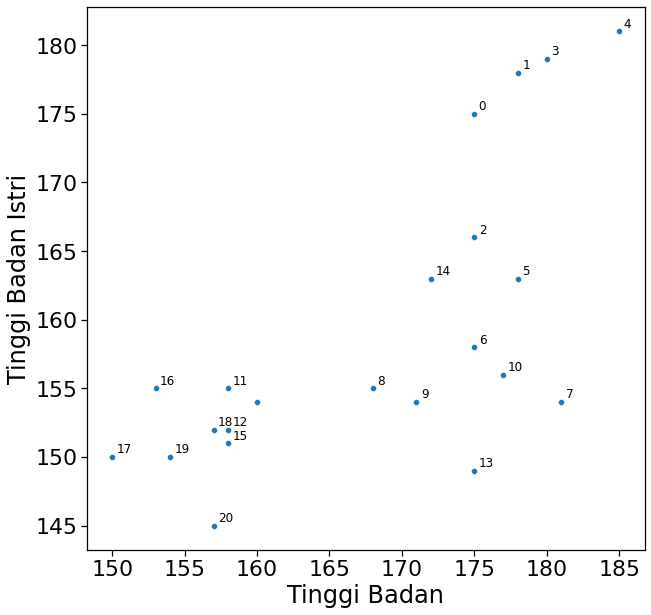

In [138]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(0,df.shape[0]-1)):
    plt.annotate(txt, (df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize = 12)

In [139]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [140]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [142]:
X_scaled[:5]

array([[0.66695822, 1.56643226],
       [0.95095333, 1.85765628],
       [0.66695822, 0.69276018],
       [1.14028341, 1.95473096],
       [1.6136086 , 2.14888031]])

In [143]:
for eps in [i/10 for i in range(6,8)]: # 0.6, 0.7
    for min_samples in range(3,6): # 3, 4, 5
        print('\neps={}'.format(eps))
        print('min_samples={}'.format(min_samples))
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        silh = silhouette_score(X_scaled, labels)
        print("Clusters present: {}".format(np.unique(labels)))
        print("Clusters size: {}".format(np.bincount(labels + 1)))
        print('Silhouette Score: {}'.format(silh))


eps=0.6
min_samples=3
Clusters present: [-1  0  1  2]
Clusters size: [1 4 8 9]
Silhouette Score: 0.4618572923610629

eps=0.6
min_samples=4
Clusters present: [-1  0  1]
Clusters size: [7 6 9]
Silhouette Score: 0.3901682187136734

eps=0.6
min_samples=5
Clusters present: [-1  0  1]
Clusters size: [8 5 9]
Silhouette Score: 0.35497113213899967

eps=0.7
min_samples=3
Clusters present: [0 1 2]
Clusters size: [0 4 9 9]
Silhouette Score: 0.6161772649616482

eps=0.7
min_samples=4
Clusters present: [0 1 2]
Clusters size: [0 4 9 9]
Silhouette Score: 0.6161772649616482

eps=0.7
min_samples=5
Clusters present: [-1  0  1]
Clusters size: [4 9 9]
Silhouette Score: 0.6161772649616482


The best clustering result is clustering with hyperparameters eps = 0.7 and min_samples = 4 because no observation included into noise (easier to interpret) and the biggest silhouette score.

In [144]:
dbscan = DBSCAN(eps=0.7, min_samples=4)
labels = dbscan.fit_predict(X_scaled)
silh = silhouette_score(X_scaled, labels)

Text(0, 0.5, 'Tinggi Badan Istri')

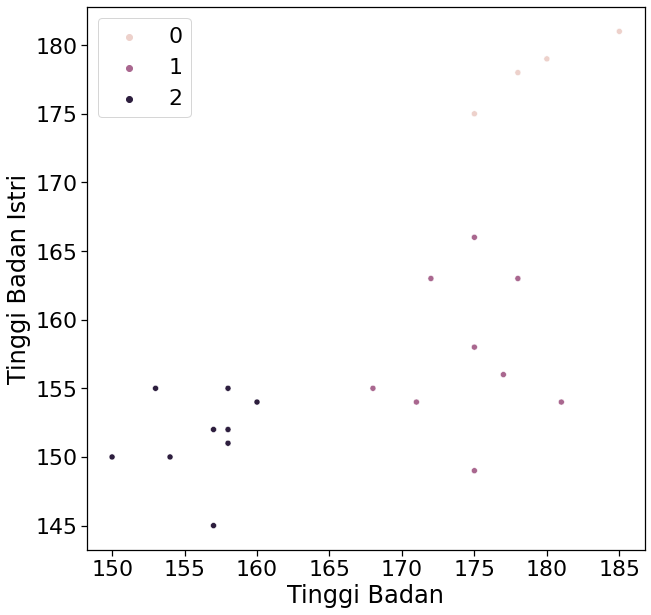

In [145]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = df['tinggibadan'], 
    y = df['tinggibadanistri'],
    hue = labels)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')